## Análisis de Sentimientos - Tweets Huawei

El presente trabajo tiene como objetivo analizar y clasificar los sentimientos en negativos y positivos de los tweets relacionados a Huawei, como parte de la coyuntura de guerra comercial entre Estados Unidos y China. Para ello, utilizaremos la clasificación de VADER, la clasificación de NLTK BAYES (con base a la obtenida con VADER), y Recurrent Neural Network.


In [1]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import twitter
import csv

In [ ]:
# TWITTER
consumerKey = "uzhTFeRq3ev0Hi7yKUZdQW5VD"
consumerSecret = "8L5TaR0Zp1Ia7LBzdcElc98nntsTlwrGTylNnxUdy7tcmjF8ru"
accesToken = "2382260569-sp0IyPH5SQ7pRUX8yfFsZzAuTAkJUvLCixtBEmT"
accesTokenSecret = "u2CdMzFg3z49DLcwlByEa6BSwtZyCpF8XmjzcF1yBtTVX"
auth = tweepy.OAuthHandler(consumer_key = consumerKey, consumer_secret = consumerSecret)
auth.set_access_token(accesToken, accesTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

Extraemos los tweets que contengan #huawei y los guardamos en un csv. Obtuvimos un dataset de 15800 tweets

In [ ]:
#csvFile = open('tw_huawei.csv','a', encoding= 'utf-8')

#csvWriter = csv.writer(csvFile, delimiter=';')

#for tweet in tweepy.Cursor(api.search,q="#huawei",count=100, lang="en", since="2019-04-04").items():
    #print (tweet.created_at, tweet.user.location, tweet.text)
    #csvWriter.writerow([tweet.created_at, tweet.user.location, tweet.text.encode('utf-8')])

In [2]:
tw = pd.read_csv('tw_huawei.csv', sep=';', header= None, encoding='iso-8859-1', names=['fecha', 'ubicación','tweet'])
tw.to_excel('huawei2.xlsx')
tw


,fecha,ubicación,tweet
0,2019-06-03 23:07:17,"Centurion, South Africa",b'RT @Lebo_Molax: Good morning to all #Huawei ...
1,2019-06-03 23:02:23,"Girardota, Colombia",b'RT @Huawei_Europe: Building a Fully Connecte...
2,2019-06-03 22:59:27,"Paris, France",b'RT @HuaweiFacts: Content continent: #Huawei ...
3,2019-06-03 22:58:55,NaN,b'Interestesting how #Huawei\xe2\x80\x99s pres...
4,2019-06-03 22:58:55,Europe,b'RT @torypython: @KateHoeyMP @POTUS @USAmbUK ...
5,2019-06-03 22:58:23,"Washington, DC",b'RT @aj_beloff: Britain listens to the United...
6,2019-06-03 22:55:44,NaN,"b'RT @HuaweiFacts: Cool, calm and collected: #..."
7,2019-06-03 22:54:47,NaN,b'RT @HuaweiFacts: See the light! This image p...
8,2019-06-03 22:53:17,NaN,"b'#Huawei, Amazon Fire, Samsung: These are the..."
9,2019-06-03 22:52:40,NaN,"b""RT @Masonsm35878042: #IEEE #Huawei IEEE ban ..."


Realizamos una limpieza de los datos extrayendo las letras que no agregan valor o significados, pasando todo a minúscula, y extrayendo los stopwords

In [3]:
import re #regular expression
from textblob import TextBlob
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS


In [4]:
def process_tweet(tweet):
    return " ".join(re.sub("b'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ", tweet.lower()).split())

In [5]:
tw['p_tweet'] = tw['tweet'].apply(process_tweet)
#tw.to_excel("tweets.xlsx")

Observamos una primera limpieza de los tweets, donde se quitan @, _, :, entre otras puntuaciones, y se pasa todo a minúscula

In [6]:
tw.head()

,fecha,ubicación,tweet,p_tweet
0,2019-06-03 23:07:17,"Centurion, South Africa",b'RT @Lebo_Molax: Good morning to all #Huawei ...,b rt lebo molax good morning to all huawei use...
1,2019-06-03 23:02:23,"Girardota, Colombia",b'RT @Huawei_Europe: Building a Fully Connecte...,b rt huawei europe building a fully connected ...
2,2019-06-03 22:59:27,"Paris, France",b'RT @HuaweiFacts: Content continent: #Huawei ...,b rt huaweifacts content continent huawei sign...
3,2019-06-03 22:58:55,NaN,b'Interestesting how #Huawei\xe2\x80\x99s pres...,b interestesting how huawei xe2 x80 x99s press...
4,2019-06-03 22:58:55,Europe,b'RT @torypython: @KateHoeyMP @POTUS @USAmbUK ...,b rt torypython katehoeymp potus usambuk anna ...


Se tokeniza los tweets y se quita los stopwords

In [9]:
from nltk.tokenize import word_tokenize
#Tokenizar frases
tw['Tokens'] = tw.apply(lambda row: word_tokenize(row['p_tweet']), axis=1)
tw['Tokens'].head()

0    [b, rt, lebo, molax, good, morning, to, all, h...
1    [b, rt, huawei, europe, building, a, fully, co...
2    [b, rt, huaweifacts, content, continent, huawe...
3    [b, interestesting, how, huawei, xe2, x80, x99...
4    [b, rt, torypython, katehoeymp, potus, usambuk...
Name: Tokens, dtype: object

Se guarda en 'Tokens2' las palabras que ya no contengan stopwords

In [10]:
#tweets = []
stopwords_set = set(stopwords.words("english"))
stopwords_set.add("to")
stopwords_set.add("https")
stopwords_set.add("i")
stopwords_set.add("t")
stopwords_set.add("out")
stopwords_set.add("co")
stopwords_set.add("b")
stopwords_set.add("rt")
stopwords_set.add("n")
stopwords_set.add("x80")
stopwords_set.add("xe2")
stopwords_set.add("xa6")
stopwords_set.add("x99s")
stopwords_set.add("nhttps")
stopwords_set.add("says")
stopwords_set.add("xf0")

tw['Tokens2'] = list(map(lambda line: list(filter(lambda word: word not in stopwords_set, line)), tw.Tokens))
tw=tw.drop(['tweet'], axis=1)
tw.head()

,fecha,ubicación,p_tweet,Tokens,Tokens2
0,2019-06-03 23:07:17,"Centurion, South Africa",b rt lebo molax good morning to all huawei use...,"[b, rt, lebo, molax, good, morning, to, all, h...","[lebo, molax, good, morning, huawei, users, ka..."
1,2019-06-03 23:02:23,"Girardota, Colombia",b rt huawei europe building a fully connected ...,"[b, rt, huawei, europe, building, a, fully, co...","[huawei, europe, building, fully, connected, i..."
2,2019-06-03 22:59:27,"Paris, France",b rt huaweifacts content continent huawei sign...,"[b, rt, huaweifacts, content, continent, huawe...","[huaweifacts, content, continent, huawei, sign..."
3,2019-06-03 22:58:55,NaN,b interestesting how huawei xe2 x80 x99s press...,"[b, interestesting, how, huawei, xe2, x80, x99...","[interestesting, huawei, press, release, ongoi..."
4,2019-06-03 22:58:55,Europe,b rt torypython katehoeymp potus usambuk anna ...,"[b, rt, torypython, katehoeymp, potus, usambuk...","[torypython, katehoeymp, potus, usambuk, anna,..."


Imprimimos las palabras más frecuentes. Esto nos ayudó a identificar las palabras como "htps" , 'i', 't', entre otros indicados que añadieron en los stopwords (para ser retirados de los tweets).

In [12]:
#Se construye diccionario
word_list = []
for index,value in tw['Tokens2'].iteritems():
    word_list.extend(value)

vocab = set(word_list)

vocab_set = sorted(vocab)

#Frecuencia de palabras
vocab_freq = dict()

for value in vocab_set:
    vocab_freq[value]=0
    
for index,item in tw['Tokens2'].iteritems():
    for word in item:
        vocab_freq[word] = vocab_freq[word] + 1
        
tw=tw.drop(['Tokens'], axis=1)
vocab_freq

{'0': 21,
 '000': 81,
 '000s': 1,
 '00bmbytjcw': 1,
 '00hrzulckx': 1,
 '00qgdduhnf': 1,
 '00xbw8q2ko': 1,
 '01': 3,
 '01mjwstn8t': 1,
 '02': 1,
 '02062019': 1,
 '02jan2019': 1,
 '02w7brfij1': 1,
 '02zbklqrvp': 1,
 '03': 1,
 '038kk4khpb': 1,
 '03uxejdoor': 1,
 '04': 2,
 '05': 7,
 '06': 3,
 '06nt9tzvgi': 1,
 '06odacizzf': 1,
 '07ajglzjj3': 1,
 '07b2keuqmh': 1,
 '07osm80jx2': 1,
 '07zyvwp22q': 1,
 '08140000114': 3,
 '08170': 1,
 '08170000': 1,
 '08olewanw6': 1,
 '08phhlc58i': 1,
 '08x9vwmial': 1,
 '08ysxsbkxg': 1,
 '09': 1,
 '0adj4mrxgv': 1,
 '0akrlzok8j': 1,
 '0ameb3mha4': 1,
 '0ayi327k2v': 1,
 '0bgo0a320g': 1,
 '0bkuwi7tsb': 1,
 '0blppwduvt': 1,
 '0bztq5pot7': 4,
 '0cs7gqo0dz': 1,
 '0cxakqxrv6': 1,
 '0cyxu3kugo': 1,
 '0d8jkz2fiz': 1,
 '0dnq2920vp': 1,
 '0dpbqzz43o': 2,
 '0dsm3tz9ip': 1,
 '0dzt8lnepx': 1,
 '0e4buep2jl': 1,
 '0ebn3yjrqs': 1,
 '0eeyflqxoi': 1,
 '0ejlkg69p1': 7,
 '0ezdeupck9': 1,
 '0f5xi9ug7d': 7,
 '0g0ceigx2b': 1,
 '0gggihfkas': 1,
 '0guwdguab7': 1,
 '0gxju6fkuu': 1,
 '0hh

In [13]:
import operator

print("Total number of unique words: " + str(len(vocab_set)))
sorted_vocab_freq = list(reversed(sorted(vocab_freq.items(), key=operator.itemgetter(1))))
print("Top 100 most frequently used words: " + str(sorted_vocab_freq[:100]))

Total number of unique words: 17755
Top 100 most frequently used words: [('huawei', 15239), ('china', 2475), ('us', 2425), ('5g', 1891), ('x9f', 1651), ('huaweifacts', 1542), ('u', 1519), ('ban', 1393), ('chinese', 1010), ('world', 983), ('mahathir', 897), ('malaysia', 851), ('trump', 802), ('tech', 799), ('europe', 768), ('uk', 744), ('ieee', 710), ('technology', 679), ('x87', 660), ('connected', 658), ('building', 648), ('new', 634), ('fully', 629), ('google', 613), ('intelligent', 608), ('je1nmlrpk8', 606), ('globaltimesnews', 596), ('trade', 564), ('like', 564), ('first', 544), ('x9d', 526), ('amp', 523), ('chinadaily', 512), ('using', 505), ('company', 496), ('apple', 488), ('scmpnews', 480), ('x99', 463), ('business', 460), ('companies', 457), ('network', 430), ('government', 423), ('cgtnofficial', 421), ('fedex', 419), ('sanctions', 418), ('xb8', 410), ('authpaper', 405), ('use', 404), ('security', 401), ('mohamad', 394), ('minister', 393), ('said', 383), ('war', 376), ('ren', 3

## APLICAMOS VADER

Aplicamos la puntuación (score) de Vader con VaderSentiment

In [14]:
%time   #tiempo de calculo del score de Vader
i=0 #counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer() 
compval1 = [ ]  #empty list to hold our computed 'compound' VADER score
while (i<len(tw)):
    k = analyser.polarity_scores(tw.iloc[i]['p_tweet'])
    compval1.append(k['compound'])
    i = i+1
    
#conversion de los valores de los sentimientos a numpy
compval1 = np.array(compval1)
len(compval1)



Wall time: 0 ns


15800

In [15]:
tw['VADER score'] = compval1
tw.head()

,fecha,ubicación,p_tweet,Tokens2,VADER score
0,2019-06-03 23:07:17,"Centurion, South Africa",b rt lebo molax good morning to all huawei use...,"[lebo, molax, good, morning, huawei, users, ka...",0.6705
1,2019-06-03 23:02:23,"Girardota, Colombia",b rt huawei europe building a fully connected ...,"[huawei, europe, building, fully, connected, i...",0.5070
2,2019-06-03 22:59:27,"Paris, France",b rt huaweifacts content continent huawei sign...,"[huaweifacts, content, continent, huawei, sign...",0.3182
3,2019-06-03 22:58:55,NaN,b interestesting how huawei xe2 x80 x99s press...,"[interestesting, huawei, press, release, ongoi...",0.0000
4,2019-06-03 22:58:55,Europe,b rt torypython katehoeymp potus usambuk anna ...,"[torypython, katehoeymp, potus, usambuk, anna,...",-0.5267


Creamos las etiquetas neutrales, positivas y negativas según Vader Score

In [17]:
%time

#se define categorias
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(tw)):
    if ((tw.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((tw.iloc[i]['VADER score'] > 0) & (tw.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((tw.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

Wall time: 0 ns


In [18]:
tw['sentiment'] = predicted_value
tw.head()

,fecha,ubicación,p_tweet,Tokens2,VADER score,sentiment
0,2019-06-03 23:07:17,"Centurion, South Africa",b rt lebo molax good morning to all huawei use...,"[lebo, molax, good, morning, huawei, users, ka...",0.6705,neutral
1,2019-06-03 23:02:23,"Girardota, Colombia",b rt huawei europe building a fully connected ...,"[huawei, europe, building, fully, connected, i...",0.5070,neutral
2,2019-06-03 22:59:27,"Paris, France",b rt huaweifacts content continent huawei sign...,"[huaweifacts, content, continent, huawei, sign...",0.3182,neutral
3,2019-06-03 22:58:55,NaN,b interestesting how huawei xe2 x80 x99s press...,"[interestesting, huawei, press, release, ongoi...",0.0000,negative
4,2019-06-03 22:58:55,Europe,b rt torypython katehoeymp potus usambuk anna ...,"[torypython, katehoeymp, potus, usambuk, anna,...",-0.5267,negative


Observamos la distribución según dichas etiquetas.  

Hay 841 tweets positivos con VADER, el 5.32% del total.
Hay 9774 tweets negativos con VADER, el 61.86% del total.
Hay 5185 tweets neutral con VADER, el 32.82% del total.


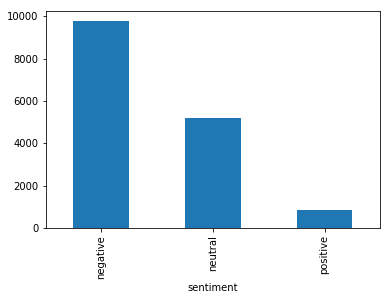

In [19]:
print("Hay",len(tw[tw['sentiment']=='positive']),\
      "tweets positivos con VADER, el",\
      "{:.2%}".format(len(tw[tw['sentiment']=='positive'])/len(tw)),"del total.")
print("Hay",len(tw[tw['sentiment']=='negative']),\
      "tweets negativos con VADER, el",\
      "{:.2%}".format(len(tw[tw['sentiment']=='negative'])/len(tw)),"del total.")
print("Hay",len(tw[tw['sentiment']=='neutral']),\
      "tweets neutral con VADER, el",\
      "{:.2%}".format(len(tw[tw['sentiment']=='neutral'])/len(tw)),"del total.")

tw.groupby('sentiment').size().plot(kind='bar')

Quitamos los tweets clasificados como neutral, dado que no aportan a la identificación de sentimientos positivos y negativos. Con lo cual nos quedamos con 10615 tweets, de los que 7.9% son positivos y 92% son negativos.

In [27]:
tw=tw[tw['sentiment']!='neutral']

In [28]:
print("Hay",len(tw), "tweets")
print("Hay",len(tw[tw['sentiment']=='positive']),\
      "tweets positivos con VADER, el",\
      "{:.2%}".format(len(tw[tw['sentiment']=='positive'])/len(tw)),"del total.")
print("Hay",len(tw[tw['sentiment']=='negative']),\
      "tweets negativos con VADER, el",\
      "{:.2%}".format(len(tw[tw['sentiment']=='negative'])/len(tw)),"del total.")


Hay 10615 tweets
Hay 841 tweets positivos con VADER, el 7.92% del total.
Hay 9774 tweets negativos con VADER, el 92.08% del total.


In [29]:
positive = tw2[tw2['sentiment']=='positive']
positive2=positive['Tokens2']


negative = tw2[tw2['sentiment']=='negative']
negative2=negative['Tokens2']

Graficamos las palabras más frecuentes según la clasificación de positivos y negativos

Positive words


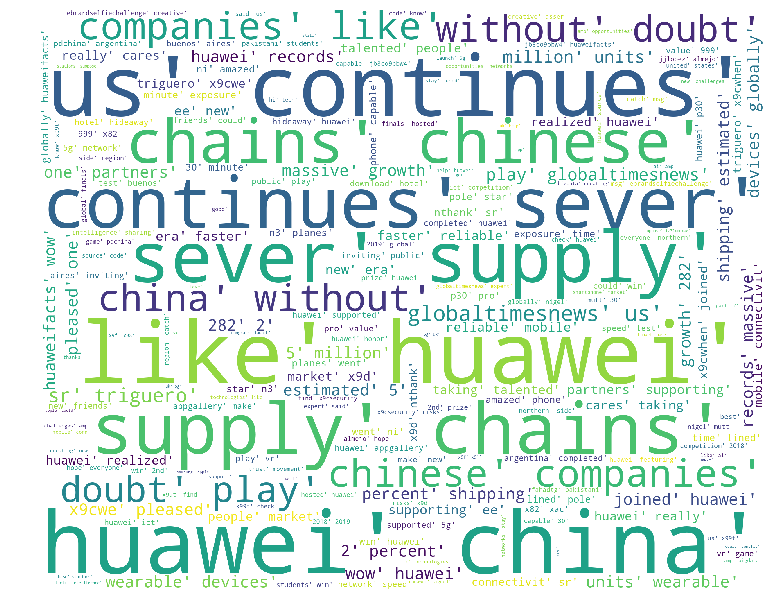

Negative words


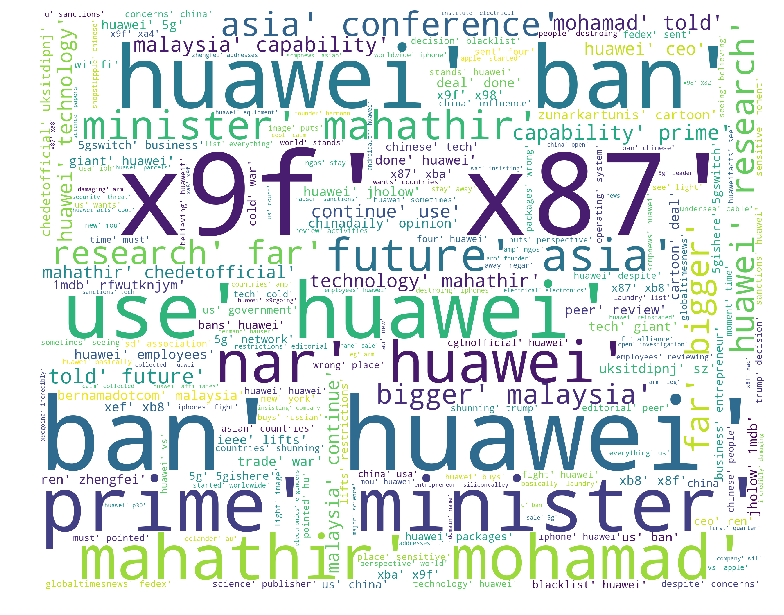

In [30]:
def wordcloud_draw(data, color = 'black'):
    words = ','.join(map(str, data))
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(positive2,'white')
print("Negative words")
wordcloud_draw(negative2,'white')

## APLICAMOS MODELO NAIVE BAYES CLASSIFIER


In [31]:
def create_sent_features(sentence):
    return {sentence: True}
#utiliza text porque usaba un diccionario {text:tweet}  

tw2=tw
tw = tw.filter(['p_tweet','sentiment'], axis=1)
tweet = tw.p_tweet
sentiment = tw.sentiment

# Se extrae features. 
featuresets = [(create_sent_features(tweet), sentiment) for index, (tweet, sentiment) in tw.iterrows()]

Separamos el dataset para entrenamiento (80%) y testeo (20%). Tenemos el dataset compuesto por los tweets y la clasificación dada por ```VADER``` para cada uno de ellos.

In [32]:
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(featuresets,test_size = 0.2)
print(train_set,"\n                ==========================================\n",test_set)

[({'b rt chinadaily ieee lifts restrictions on editorial and peer review activities on employees of huawei and its affiliates trade https xe2 x80 xa6': True}, 'negative'), ({'b rt bivnews reconsider china investments tibetan official urges nhttps t co jitusb9rs2 huawei mengwanzhou asiapacific tibet https xe2 x80 xa6': True}, 'negative'), ({'b huawei maintained its second spot in the global smartphones market gartner huawei https t co ciyiw646uv': True}, 'negative'), ({'b rt eolander the au s new mou with huawei is basically a laundry list of everything the us wants countries amp ngos to stay away from regar xe2 x80 xa6': True}, 'negative'), ({'b rt firdyfire malaysia will use huawei tech as much as possible mahathir says https t co zjj30p4knl chedetofficial huawei malaysia': True}, 'negative'), ({'b telecom xe2 x80 x99s tangled horizon amp tariffs xe2 x80 x99 consequences for commodities https t co 71uuqwhq7v n n boombustrt n n huawei xe2 x80 xa6 https t co zzushybszh': True}, 'negativ

Aplicamos el modelo de predicción con el dataset de entrenamiento. Entrenamos el modelo con la clasificación que hace VADER

In [33]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

classifier = nltk.NaiveBayesClassifier.train(train_set)
accuracy = nltk.classify.accuracy(classifier, test_set) 

In [34]:
print("El % de efectividad de nuestro modelo es del","{:.2%}".format(nltk.classify.accuracy(classifier, test_set)))

El % de efectividad de nuestro modelo es del 97.13%


Una vez entrenado el dataset train_set, aplicamos el modelo de predicción NLTK BAYES al conjunto de test. Se guarda el resultado en test_predicted.

In [35]:
test_predicted = []
for line in test_set:
    test_classificator = classifier.classify(line[0])
    test_predicted.append((line[0],line[1], test_classificator))
print("Ejemplo del contenido: \n",test_predicted[0])
print("======================================\n")
print(test_predicted)

Ejemplo del contenido: 
 ({'how about huawei': True}, 'negative', 'negative')

[({'how about huawei': True}, 'negative', 'negative'), ({'b rt gipuniovi 5g contract huawei amp dubai xf0 x9f xa4 xb3 nhttps t co ia0pje8uba': True}, 'negative', 'negative'), ({'b huawei mate x achieved over 1gbps speed on 5g network test huawei huaweimatex 5g https t co w0eo54s8fd': True}, 'negative', 'negative'), ({'b why have the latest foldable phones gotten off to a disastrous start https t co 2hjhromcij samsung huawei https t co 4xoeikxqov': True}, 'negative', 'negative'), ({'b rt techkimmi us china trade huawei is drilling a hole at the bottom of a sinking titanic https t co ftwerglodb technews technology xe2 x80 xa6': True}, 'negative', 'negative'), ({'b rt zunarkartunis cartoon deal done n huawei jholow 1mdb https t co rfwutknjym': True}, 'negative', 'negative'), ({'b rt sabcnewsonline china will investigate whether fedex corp damaged the legal rights and interests of its clients after chinese telec

Lo pasamos a Dataframe

In [53]:
tweet_frame = pd.DataFrame(test_predicted, columns=['text', 'VADER_sentiment','sentiment_predicted'])
#aqui completas con:
#for tweet in range(len(test_predicted)):
 #   tweet_frame.loc[tweet]= [test_predicted[tweet][0]['text'], test_predicted[tweet][1], test_predicted[tweet][2]]
#utiliza text porque usaba un diccionario {text:tweet}  
tweet_frame.head(10)


,text,VADER_sentiment,sentiment_predicted
0,{'how about huawei': True},negative,negative
1,{'b rt gipuniovi 5g contract huawei amp dubai ...,negative,negative
2,{'b huawei mate x achieved over 1gbps speed on...,negative,negative
3,{'b why have the latest foldable phones gotten...,negative,negative
4,{'b rt techkimmi us china trade huawei is dril...,negative,negative
5,{'b rt zunarkartunis cartoon deal done n huawe...,negative,negative
6,{'b rt sabcnewsonline china will investigate w...,negative,negative
7,{'b rt rt com xe2 x80 x98trump xe2 x80 x99s ba...,negative,negative
8,{'b rt qingqingparis huawei will also continue...,negative,negative
9,{'b rt huaweifacts washington s actions agains...,negative,negative


## COMPARATIVA VADER Y NLTK BAYES


In [61]:
print("------------------------------Positivos--------------------------")
print("Hay",len(tweet_frame[tweet_frame['VADER_sentiment']=='positive']),"tweets positivos con VADER")
print("Hay",len(tweet_frame[tweet_frame['sentiment_predicted']=='positive']),"tweets positivos con NLTK BAYES")
      

print("------------------------------Negativos--------------------------")
print("Hay",len(tweet_frame[tweet_frame['VADER_sentiment']=='negative']),"tweets negativos con VADER")
print("Hay",len(tweet_frame[tweet_frame['sentiment_predicted']=='negative']),"tweets negativos con NLTK BAYES")

print("------------------------------Conclusión--------------------------")
print("De los",len(tweet_frame),\
      "tweets que forman el dataset 'test_set', hay diferencias en la clasificación que hace VADER respecto de NLTK BAYES en",len(tweet_frame[tweet_frame['VADER_sentiment']!=tweet_frame['sentiment_predicted']])\
      ,"de ellas.")

------------------------------Positivos--------------------------
Hay 153 tweets positivos con VADER
Hay 92 tweets positivos con NLTK BAYES
------------------------------Negativos--------------------------
Hay 1970 tweets negativos con VADER
Hay 2031 tweets negativos con NLTK BAYES
------------------------------Conclusión--------------------------
De los 2123 tweets que forman el dataset 'test_set', hay diferencias en la clasificación que hace VADER respecto de NLTK BAYES en 61 de ellas.


## Recurrent Neural Network

In [40]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from keras.preprocessing.text import text_to_word_sequence
import re

Using TensorFlow backend.


In [44]:
tw = tw.rename(columns={'p_tweet': 'text'})
#tw = tw[tw.sentiment != "neutral"]

tw['text'] = tw['text'].apply(lambda x: x.lower())
tw['text'] = tw['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

for idx,row in tw.iterrows():
    row[0] = row[0].replace('rt',' ')
    
print(len(tw))
print(tw[ tw['sentiment'] == 'positive'].size)
print(tw[ tw['sentiment'] == 'negative'].size)

10615
1682
19548


In [45]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(tw['text'].values)
X = tokenizer.texts_to_sequences(tw['text'].values)
X = pad_sequences(X)

Se definen los hiperparámetros embed_dim, lstm_out, batch_size, droupout:

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Aquí defino los conjuntos de entrenamiento y testeo

In [ ]:
Y = pd.get_dummies(tw['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Entrenamos con 7 epochs

In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Extraemos un conjunto de validación para medir el score y el accuracy del modelo

In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

Por último, medimos las respuestas correctas de positivos y negativos.

In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")